### This script contains the following:

#### 1. Import Libraries and data
#### 2. Merge Dataframes into one dataframe
#### 3. Consistency checks & preprocessing
#### 4. Define X and y and split the merged dataframe into training and testing sets
#### 5. Artificial Neural Network
#### 6. ANN #1
#### 7. Confusion Matrix #1
#### 8. Classification Report #1
#### 9. ANN #2
#### 10. Confusion Matrix #2
#### 11. Classification Report #2
#### 12. ANN #3
#### 13. Confusion Matrix #3
#### 14. Classification Report #3
#### 15. ANN #4
#### 16. Confusion Matrix #4
#### 17. Classification Report #4

## Import Libraries and data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import os
import operator
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import graphviz
from sklearn import datasets
from sklearn import metrics
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from matplotlib.pyplot import figure
from mpl_toolkits import mplot3d
from plotly.offline import download_plotlyjs, init_notebook_mode
from plotly.offline import plot, iplot
from sklearn.neighbors import KNeighborsClassifier

In [4]:
## Path
path = r'//Users/urvi/Desktop/Machine Learning with Python/Achivement 1/Climate Wins /02 Data'

In [6]:
# Import Dataset-weather-prediction-dataset-processed.csv
climate=pd.read_csv(os.path.join(path,'Original Data', 'Dataset-weather-prediction-dataset-processed.csv'), index_col = False)

In [7]:
climate.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


In [8]:
# Drop the columns for GDANSK, ROMA, and TOURS from the scaled data set
climate2 = climate.drop(columns=['GDANSK_cloud_cover', 'GDANSK_humidity', 'GDANSK_precipitation', 'GDANSK_snow_depth', 'GDANSK_temp_mean', 'GDANSK_temp_min', 'GDANSK_temp_max', 'ROMA_cloud_cover', 'ROMA_wind_speed', 'ROMA_humidity', 'ROMA_pressure', 'ROMA_sunshine', 'ROMA_temp_mean', 'TOURS_wind_speed', 'TOURS_humidity', 'TOURS_pressure', 'TOURS_global_radiation', 'TOURS_precipitation', 'TOURS_temp_mean', 'TOURS_temp_min', 'TOURS_temp_max'])

In [9]:
climate2.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


In [10]:
climate2.shape

(22950, 149)

In [11]:
print(climate2.columns.tolist())

['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_wind_speed', 'BASEL_humidity', 'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation', 'BASEL_snow_depth', 'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max', 'BELGRADE_cloud_cover', 'BELGRADE_humidity', 'BELGRADE_pressure', 'BELGRADE_global_radiation', 'BELGRADE_precipitation', 'BELGRADE_sunshine', 'BELGRADE_temp_mean', 'BELGRADE_temp_min', 'BELGRADE_temp_max', 'BUDAPEST_cloud_cover', 'BUDAPEST_humidity', 'BUDAPEST_pressure', 'BUDAPEST_global_radiation', 'BUDAPEST_precipitation', 'BUDAPEST_sunshine', 'BUDAPEST_temp_mean', 'BUDAPEST_temp_min', 'BUDAPEST_temp_max', 'DEBILT_cloud_cover', 'DEBILT_wind_speed', 'DEBILT_humidity', 'DEBILT_pressure', 'DEBILT_global_radiation', 'DEBILT_precipitation', 'DEBILT_sunshine', 'DEBILT_temp_mean', 'DEBILT_temp_min', 'DEBILT_temp_max', 'DUSSELDORF_cloud_cover', 'DUSSELDORF_wind_speed', 'DUSSELDORF_humidity', 'DUSSELDORF_pressure', 'DUSSELDORF_global_radiation', 'DUSSELDORF_pr

In [12]:
# Import library
from sklearn.multioutput import MultiOutputClassifier

In [13]:
# Import Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv
answers=pd.read_csv(os.path.join(path,'Original Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col = False)

In [14]:
answers.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
answers.shape

(22950, 16)

### Merge Dataframes into one dataframe

In [16]:
#Merge climate2 dataframe with answers dataframe
df_merged = climate2.merge(answers, on = 'DATE', indicator = True)

In [17]:
df_merged.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather,_merge
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,0,0,0,0,0,0,0,0,0,both
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,0,0,0,0,0,0,0,0,0,both
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,0,0,0,0,0,0,0,0,0,both
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,0,0,0,0,0,0,0,0,0,both
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,0,0,0,0,0,0,0,0,0,both


In [18]:
print(df_merged.columns.tolist())

['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_wind_speed', 'BASEL_humidity', 'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation', 'BASEL_snow_depth', 'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max', 'BELGRADE_cloud_cover', 'BELGRADE_humidity', 'BELGRADE_pressure', 'BELGRADE_global_radiation', 'BELGRADE_precipitation', 'BELGRADE_sunshine', 'BELGRADE_temp_mean', 'BELGRADE_temp_min', 'BELGRADE_temp_max', 'BUDAPEST_cloud_cover', 'BUDAPEST_humidity', 'BUDAPEST_pressure', 'BUDAPEST_global_radiation', 'BUDAPEST_precipitation', 'BUDAPEST_sunshine', 'BUDAPEST_temp_mean', 'BUDAPEST_temp_min', 'BUDAPEST_temp_max', 'DEBILT_cloud_cover', 'DEBILT_wind_speed', 'DEBILT_humidity', 'DEBILT_pressure', 'DEBILT_global_radiation', 'DEBILT_precipitation', 'DEBILT_sunshine', 'DEBILT_temp_mean', 'DEBILT_temp_min', 'DEBILT_temp_max', 'DUSSELDORF_cloud_cover', 'DUSSELDORF_wind_speed', 'DUSSELDORF_humidity', 'DUSSELDORF_pressure', 'DUSSELDORF_global_radiation', 'DUSSELDORF_pr

### Consistency checks & preprocessing

In [19]:
# Drop the columns for 'DATE', 'MONTH', '_merge' from the df_merged data set
df_merged2 = df_merged.drop(columns=['DATE', 'MONTH', '_merge'])

In [20]:
df_merged2.head()

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,7,2.1,0.85,1.018,0.32,0.09,0,0.7,6.5,0.8,...,0,0,0,0,0,0,0,0,0,0
1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,6.1,3.3,...,0,0,0,0,0,0,0,0,0,0
2,8,2.1,0.90,1.018,0.18,0.30,0,0.0,8.5,5.1,...,0,0,0,0,0,0,0,0,0,0
3,3,2.1,0.92,1.018,0.58,0.00,0,4.1,6.3,3.8,...,0,0,0,0,0,0,0,0,0,0
4,6,2.1,0.95,1.018,0.65,0.14,0,5.4,3.0,-0.7,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# Check for missing values

df_merged2.isnull().sum()

BASEL_cloud_cover             0
BASEL_wind_speed              0
BASEL_humidity                0
BASEL_pressure                0
BASEL_global_radiation        0
                             ..
MUNCHENB_pleasant_weather     0
OSLO_pleasant_weather         0
SONNBLICK_pleasant_weather    0
STOCKHOLM_pleasant_weather    0
VALENTIA_pleasant_weather     0
Length: 162, dtype: int64

In [22]:
# Check for duplicate values

dups = df_merged2.duplicated()

In [23]:
dups

0        False
1        False
2        False
3        False
4        False
         ...  
22945    False
22946    False
22947    False
22948    False
22949    False
Length: 22950, dtype: bool

#### No missing values and no duplicate values

### Define X and y and split the merged dataframe into training and testing sets

In [24]:
X = df_merged2.drop(columns=['BASEL_pleasant_weather', 'BELGRADE_pleasant_weather', 'BUDAPEST_pleasant_weather', 'DEBILT_pleasant_weather', 'DUSSELDORF_pleasant_weather', 'HEATHROW_pleasant_weather', 'KASSEL_pleasant_weather', 'LJUBLJANA_pleasant_weather', 'MAASTRICHT_pleasant_weather', 'MADRID_pleasant_weather', 'MUNCHENB_pleasant_weather', 'OSLO_pleasant_weather', 'SONNBLICK_pleasant_weather', 'STOCKHOLM_pleasant_weather', 'VALENTIA_pleasant_weather'])
y = df_merged2[['BASEL_pleasant_weather', 'BELGRADE_pleasant_weather', 'BUDAPEST_pleasant_weather', 'DEBILT_pleasant_weather', 'DUSSELDORF_pleasant_weather', 'HEATHROW_pleasant_weather', 'KASSEL_pleasant_weather', 'LJUBLJANA_pleasant_weather', 'MAASTRICHT_pleasant_weather', 'MADRID_pleasant_weather', 'MUNCHENB_pleasant_weather', 'OSLO_pleasant_weather', 'SONNBLICK_pleasant_weather', 'STOCKHOLM_pleasant_weather', 'VALENTIA_pleasant_weather']]

In [25]:
# Split the merged DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(18360, 147)
(4590, 147)
(18360, 15)
(4590, 15)


### Artificial Neural Network

In [27]:
X_train[:10]

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
12262,7,2.1,0.72,1.0204,1.41,0.00,0,0.9,21.2,17.6,...,7,0.88,1.0138,1.39,0.01,0,1.7,16.0,13.2,18.8
9334,2,2.1,0.62,1.0248,3.23,0.00,0,14.0,18.5,10.7,...,6,0.91,1.0170,1.56,0.03,0,3.8,14.2,12.4,16.1
7100,5,2.1,0.84,1.0180,2.38,1.08,0,6.0,18.3,12.4,...,8,0.92,1.0170,0.57,0.37,0,0.0,14.2,11.8,16.6
12030,8,2.2,0.93,1.0083,0.18,0.80,0,0.0,5.0,3.7,...,7,0.86,1.0196,0.12,0.66,0,0.0,8.9,6.9,11.0
2958,6,2.1,0.93,1.0180,0.33,0.22,0,0.1,1.6,0.7,...,4,0.87,0.9887,0.63,0.29,0,2.4,3.2,1.0,5.3
14673,5,2.1,0.61,1.0234,1.28,0.00,0,7.1,5.1,0.2,...,3,0.72,1.0317,1.29,0.00,0,8.5,4.4,-0.8,9.6
22479,3,1.7,0.75,1.0191,2.68,0.00,0,8.1,20.9,16.2,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
3248,0,2.1,0.85,1.0180,0.84,0.00,0,7.4,1.0,-2.7,...,7,0.90,1.0129,0.26,1.42,0,0.2,11.1,9.0,13.1
22941,7,2.1,0.67,1.0138,1.34,0.22,0,3.1,17.3,12.3,...,5,0.82,1.0142,1.13,0.41,0,3.4,10.7,7.9,13.5
18962,6,2.9,0.86,1.0217,0.59,0.00,0,3.6,7.6,4.1,...,5,0.82,1.0142,0.21,0.41,0,3.4,10.7,7.9,13.5


In [28]:
#Scaling the data
scaler = StandardScaler()

#Fit the train data
scaler.fit(X_train)

#Scaling the X data
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

print(X_train_sc[:10])

[[ 0.66612347 -0.03017047 -0.34557088 ...  1.57377387  1.43848507
   1.5088298 ]
 [-1.41063437 -0.03017047 -1.25115184 ...  1.03425303  1.22000474
   0.73505572]
 [-0.16457967 -0.03017047  0.74112628 ...  1.03425303  1.05614448
   0.87834722]
 ...
 [-2.24133751 -0.03017047  0.83168437 ...  0.10507825  0.2914633
  -0.12469326]
 [ 0.66612347 -0.03017047 -0.79836136 ... -0.01481527 -0.00894716
  -0.01006006]
 [ 0.2507719   1.07355033  0.92224247 ... -0.01481527 -0.00894716
  -0.01006006]]


In [29]:
# Assign the scaled data to DataFrames
X_train_df = pd.DataFrame(X_train_sc, index=X_train.index, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_sc, index=X_test.index, columns=X_test.columns)

### ANN #1

In [30]:
# Create the ANN
# hidden_layer_sizes has up to three layers, each with a number of nodes. So (5, 5) is two hidden layers with 5 nodes each,
# and (100, 50, 25) is three hidden layers with 100, 50, and 25 nodes.
mlp = MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500, tol=0.0001)
# Fit the data to the model
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=500)

In [31]:
y_pred = mlp.predict(X_train)
print(accuracy_score(y_pred, y_train))
y_pred_test = mlp.predict(X_test)
print(accuracy_score(y_pred_test, y_test))

0.40185185185185185
0.4137254901960784


### Confusion Matrix #1

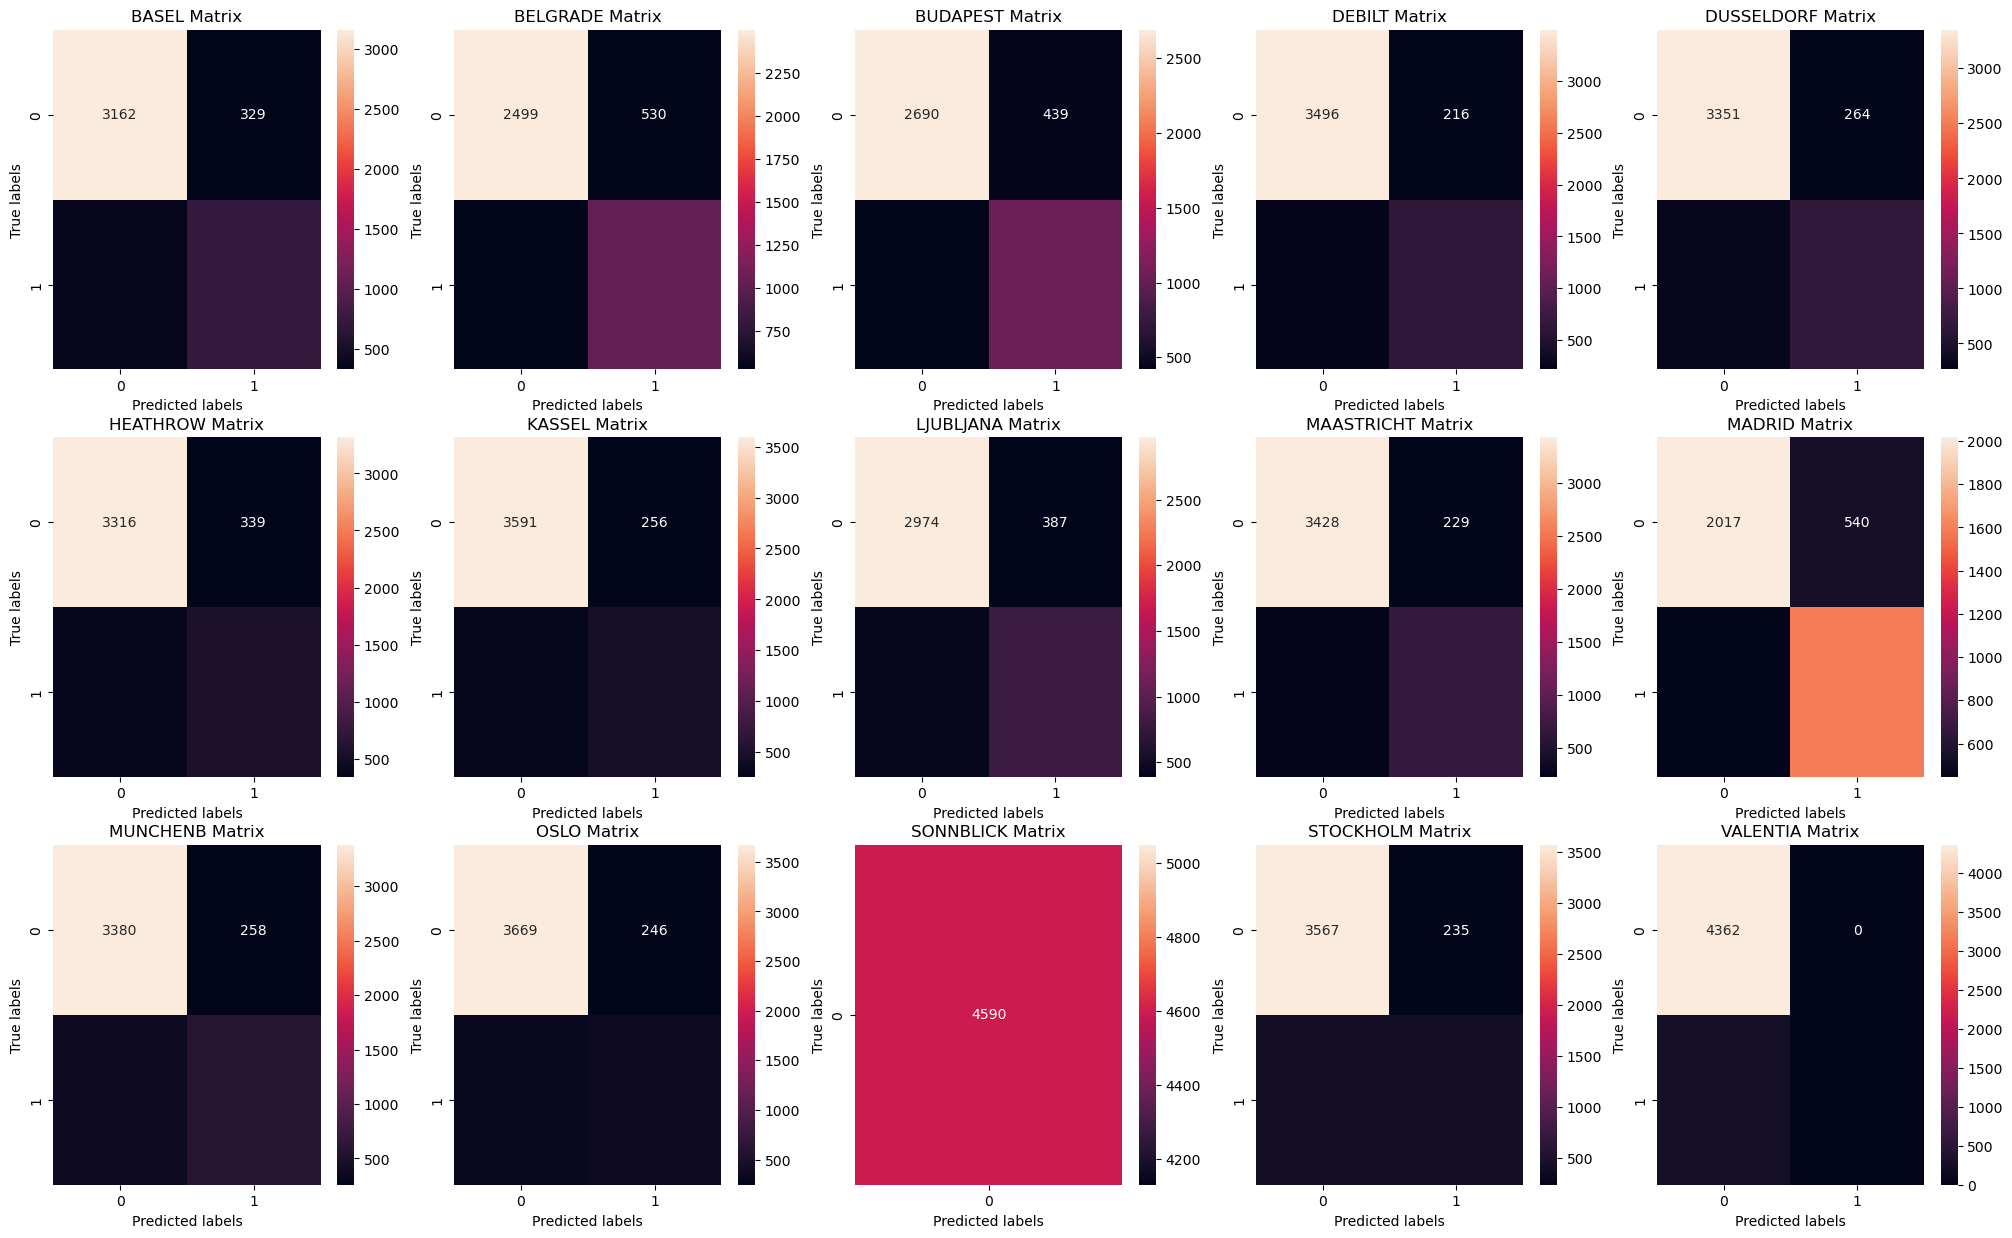

In [32]:
locations = list({x.split('_')[0] for x in df_merged2.columns if x not in ['MONTH', 'DATE']})
locations.sort()
locations
key = '_pleasant_weather'
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

### Classification Report #1

In [33]:
from sklearn.metrics import classification_report

In [34]:
# Generate the classification report
report = classification_report(y_test, y_pred_test)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.69      0.66      0.68      1099
           1       0.66      0.66      0.66      1561
           2       0.70      0.71      0.71      1461
           3       0.74      0.71      0.73       878
           4       0.72      0.69      0.70       975
           5       0.62      0.59      0.61       935
           6       0.63      0.59      0.61       743
           7       0.68      0.65      0.66      1229
           8       0.75      0.73      0.74       933
           9       0.75      0.78      0.76      2033
          10       0.69      0.62      0.65       952
          11       0.59      0.53      0.56       675
          12       0.00      0.00      0.00         0
          13       0.63      0.50      0.56       788
          14       0.00      0.00      0.00       228

   micro avg       0.69      0.66      0.67     14490
   macro avg       0.59      0.56      0.58     14490
weighted avg       0.68   

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` p

### ANN #2

In [37]:
# Create the ANN
mlp2 = MLPClassifier(hidden_layer_sizes=(100, 50, 25), max_iter=1000, tol=0.0001)
# Fit the data to the model
mlp2.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 50, 25), max_iter=1000)

In [38]:
y_pred2 = mlp2.predict(X_train)
print(accuracy_score(y_pred2, y_train))
y_pred_test2 = mlp2.predict(X_test)
print(accuracy_score(y_pred_test2, y_test))

0.668082788671024
0.5860566448801743


### Confusion Matrix #2 

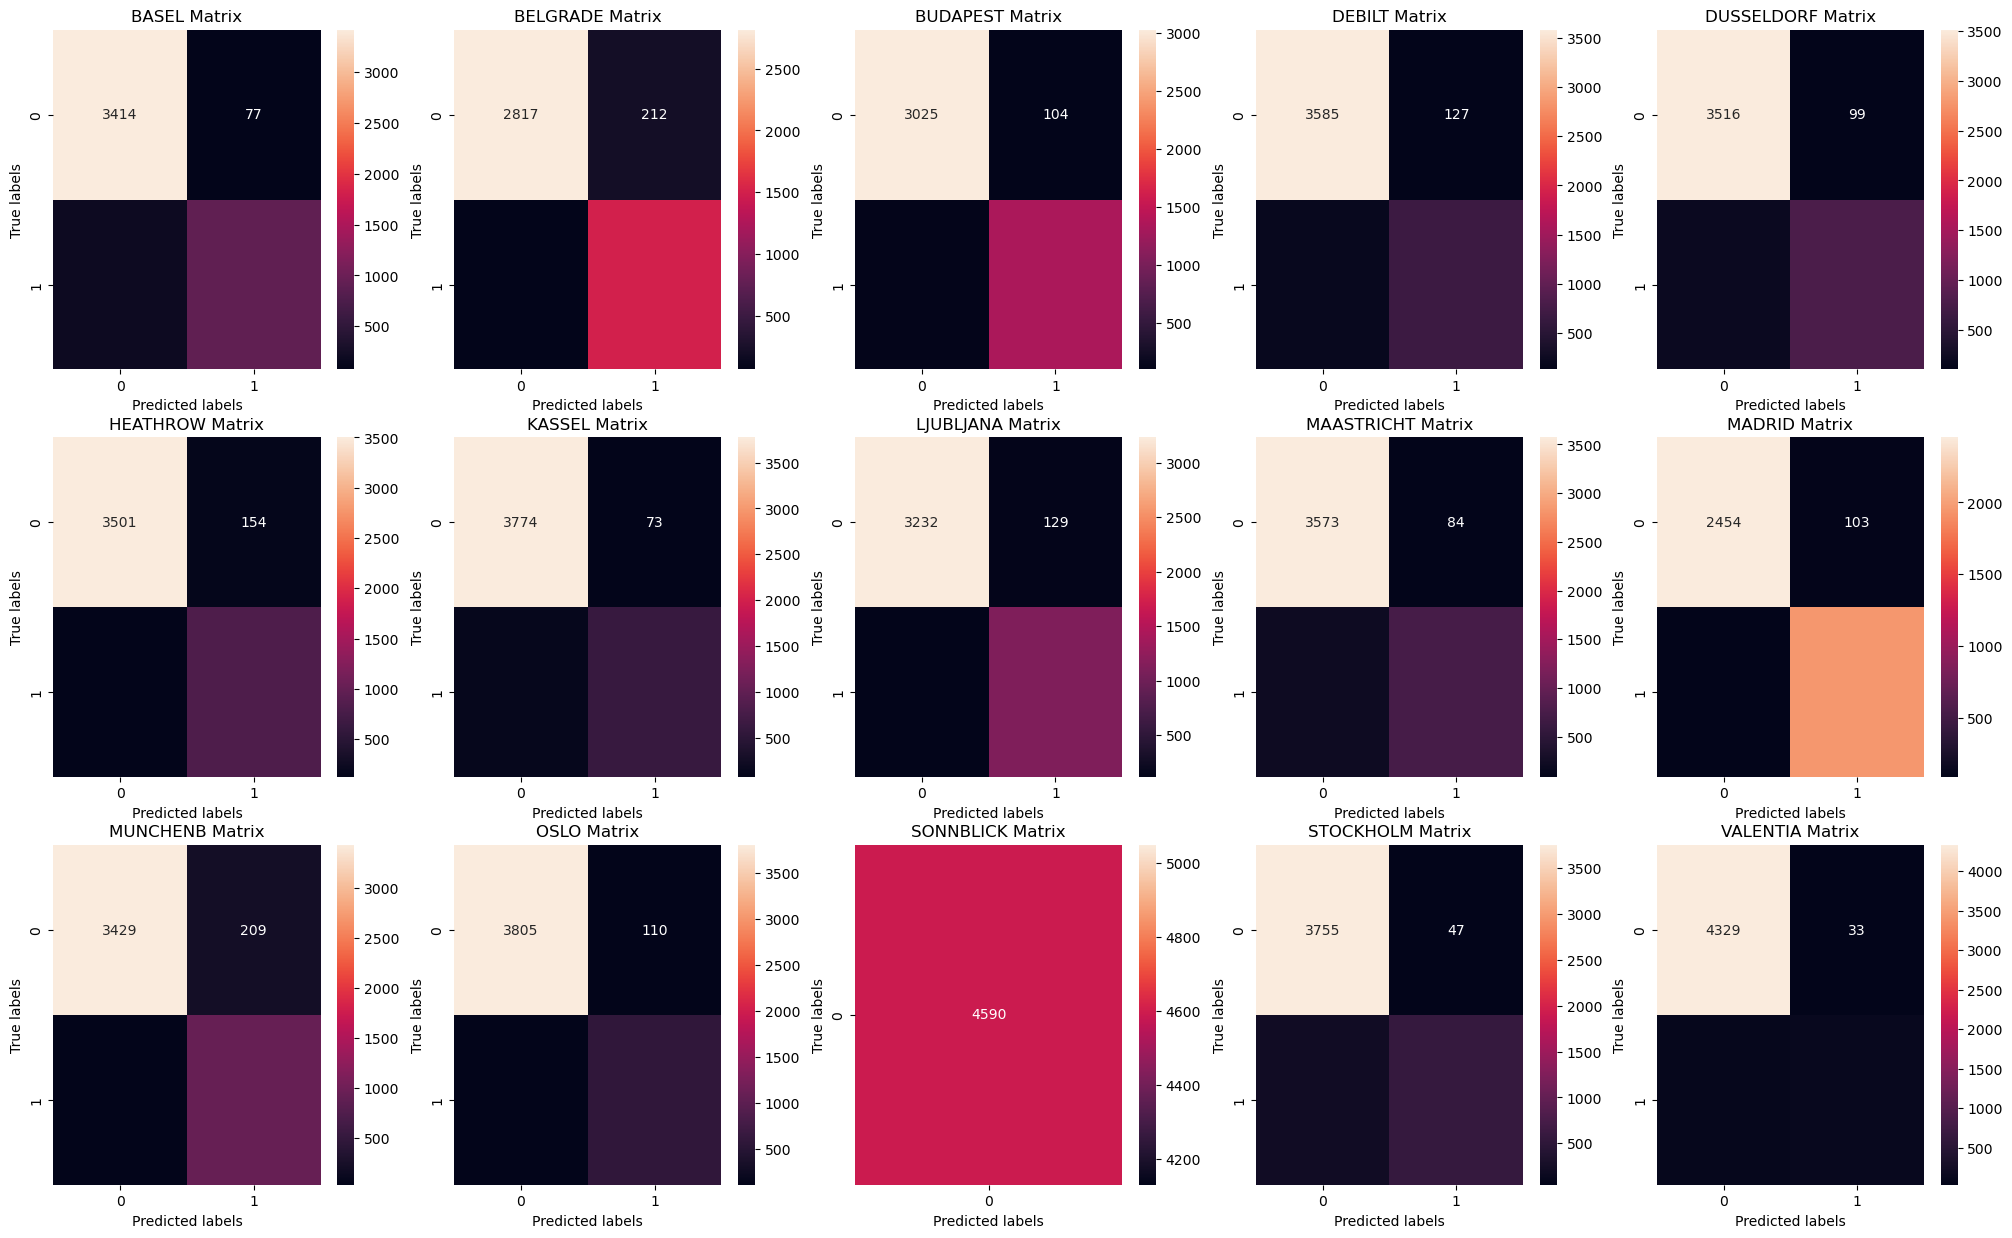

In [39]:
locations = list({x.split('_')[0] for x in df_merged2.columns if x not in ['MONTH', 'DATE']})
locations.sort()
locations
key = '_pleasant_weather'
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test2[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

### Classification Report #2

In [40]:
# Generate the classification report
report2 = classification_report(y_test, y_pred_test2)

# Print the classification report
print(report2)

              precision    recall  f1-score   support

           0       0.92      0.83      0.87      1099
           1       0.88      0.96      0.92      1561
           2       0.93      0.92      0.92      1461
           3       0.84      0.77      0.80       878
           4       0.89      0.80      0.84       975
           5       0.84      0.87      0.85       935
           6       0.89      0.83      0.86       743
           7       0.90      0.91      0.90      1229
           8       0.90      0.78      0.83       933
           9       0.95      0.96      0.95      2033
          10       0.82      0.97      0.89       952
          11       0.84      0.84      0.84       675
          12       0.00      0.00      0.00         0
          13       0.92      0.72      0.81       788
          14       0.80      0.58      0.67       228

   micro avg       0.89      0.87      0.88     14490
   macro avg       0.82      0.78      0.80     14490
weighted avg       0.89   

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` p

### ANN #3

In [41]:
# Create the ANN
mlp3 = MLPClassifier(hidden_layer_sizes=(500, 300, 100), max_iter=5000, tol=0.0001)
# Fit the data to the model
mlp3.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(500, 300, 100), max_iter=5000)

In [42]:
y_pred3 = mlp3.predict(X_train)
print(accuracy_score(y_pred3, y_train))
y_pred_test3 = mlp3.predict(X_test)
print(accuracy_score(y_pred_test3, y_test))

0.908115468409586
0.5418300653594771


### Confusion Matrix #3

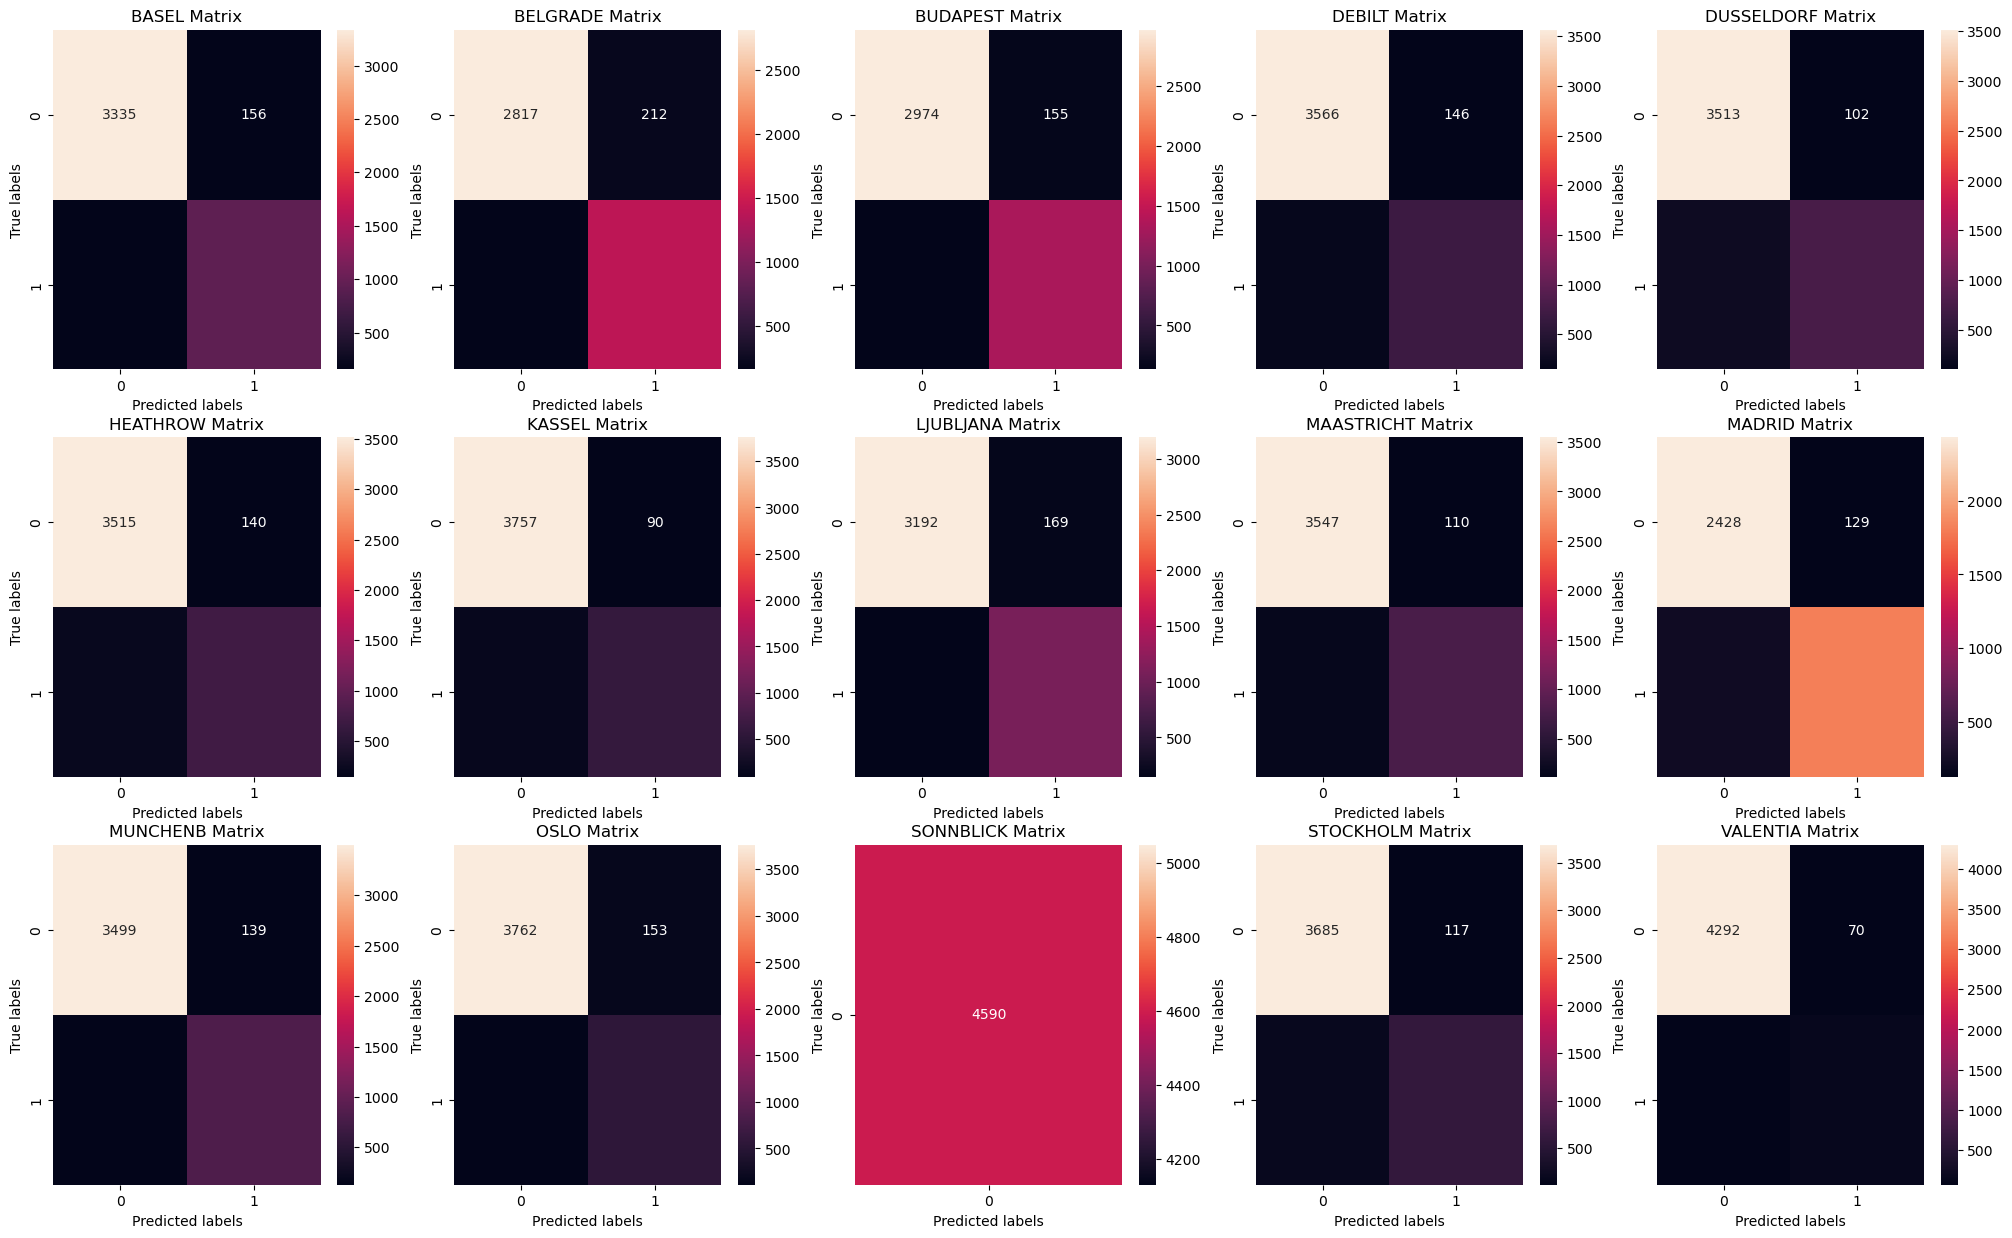

In [43]:
locations = list({x.split('_')[0] for x in df_merged2.columns if x not in ['MONTH', 'DATE']})
locations.sort()
locations
key = '_pleasant_weather'
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test3[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

### Classification Report #3

In [44]:
# Generate the classification report
report3 = classification_report(y_test, y_pred_test3)

# Print the classification report
print(report3)

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1099
           1       0.87      0.90      0.88      1561
           2       0.90      0.91      0.90      1461
           3       0.82      0.78      0.80       878
           4       0.88      0.77      0.82       975
           5       0.84      0.77      0.80       935
           6       0.87      0.80      0.83       743
           7       0.87      0.88      0.87      1229
           8       0.88      0.83      0.85       933
           9       0.93      0.89      0.91      2033
          10       0.86      0.86      0.86       952
          11       0.79      0.84      0.81       675
          12       0.00      0.00      0.00         0
          13       0.84      0.76      0.79       788
          14       0.67      0.64      0.65       228

   micro avg       0.87      0.84      0.85     14490
   macro avg       0.79      0.76      0.78     14490
weighted avg       0.87   

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` p

### ANN #4

In [46]:
# Create the ANN
mlp4 = MLPClassifier(hidden_layer_sizes=(550, 350, 150), max_iter=5500, tol=0.0001, alpha=0.001)
# Fit the data to the model
mlp4.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=(550, 350, 150), max_iter=5500)

In [47]:
y_pred4 = mlp4.predict(X_train)
print(accuracy_score(y_pred4, y_train))
y_pred_test4 = mlp4.predict(X_test)
print(accuracy_score(y_pred_test4, y_test))

0.943681917211329
0.5352941176470588


### Confusion Matrix #4

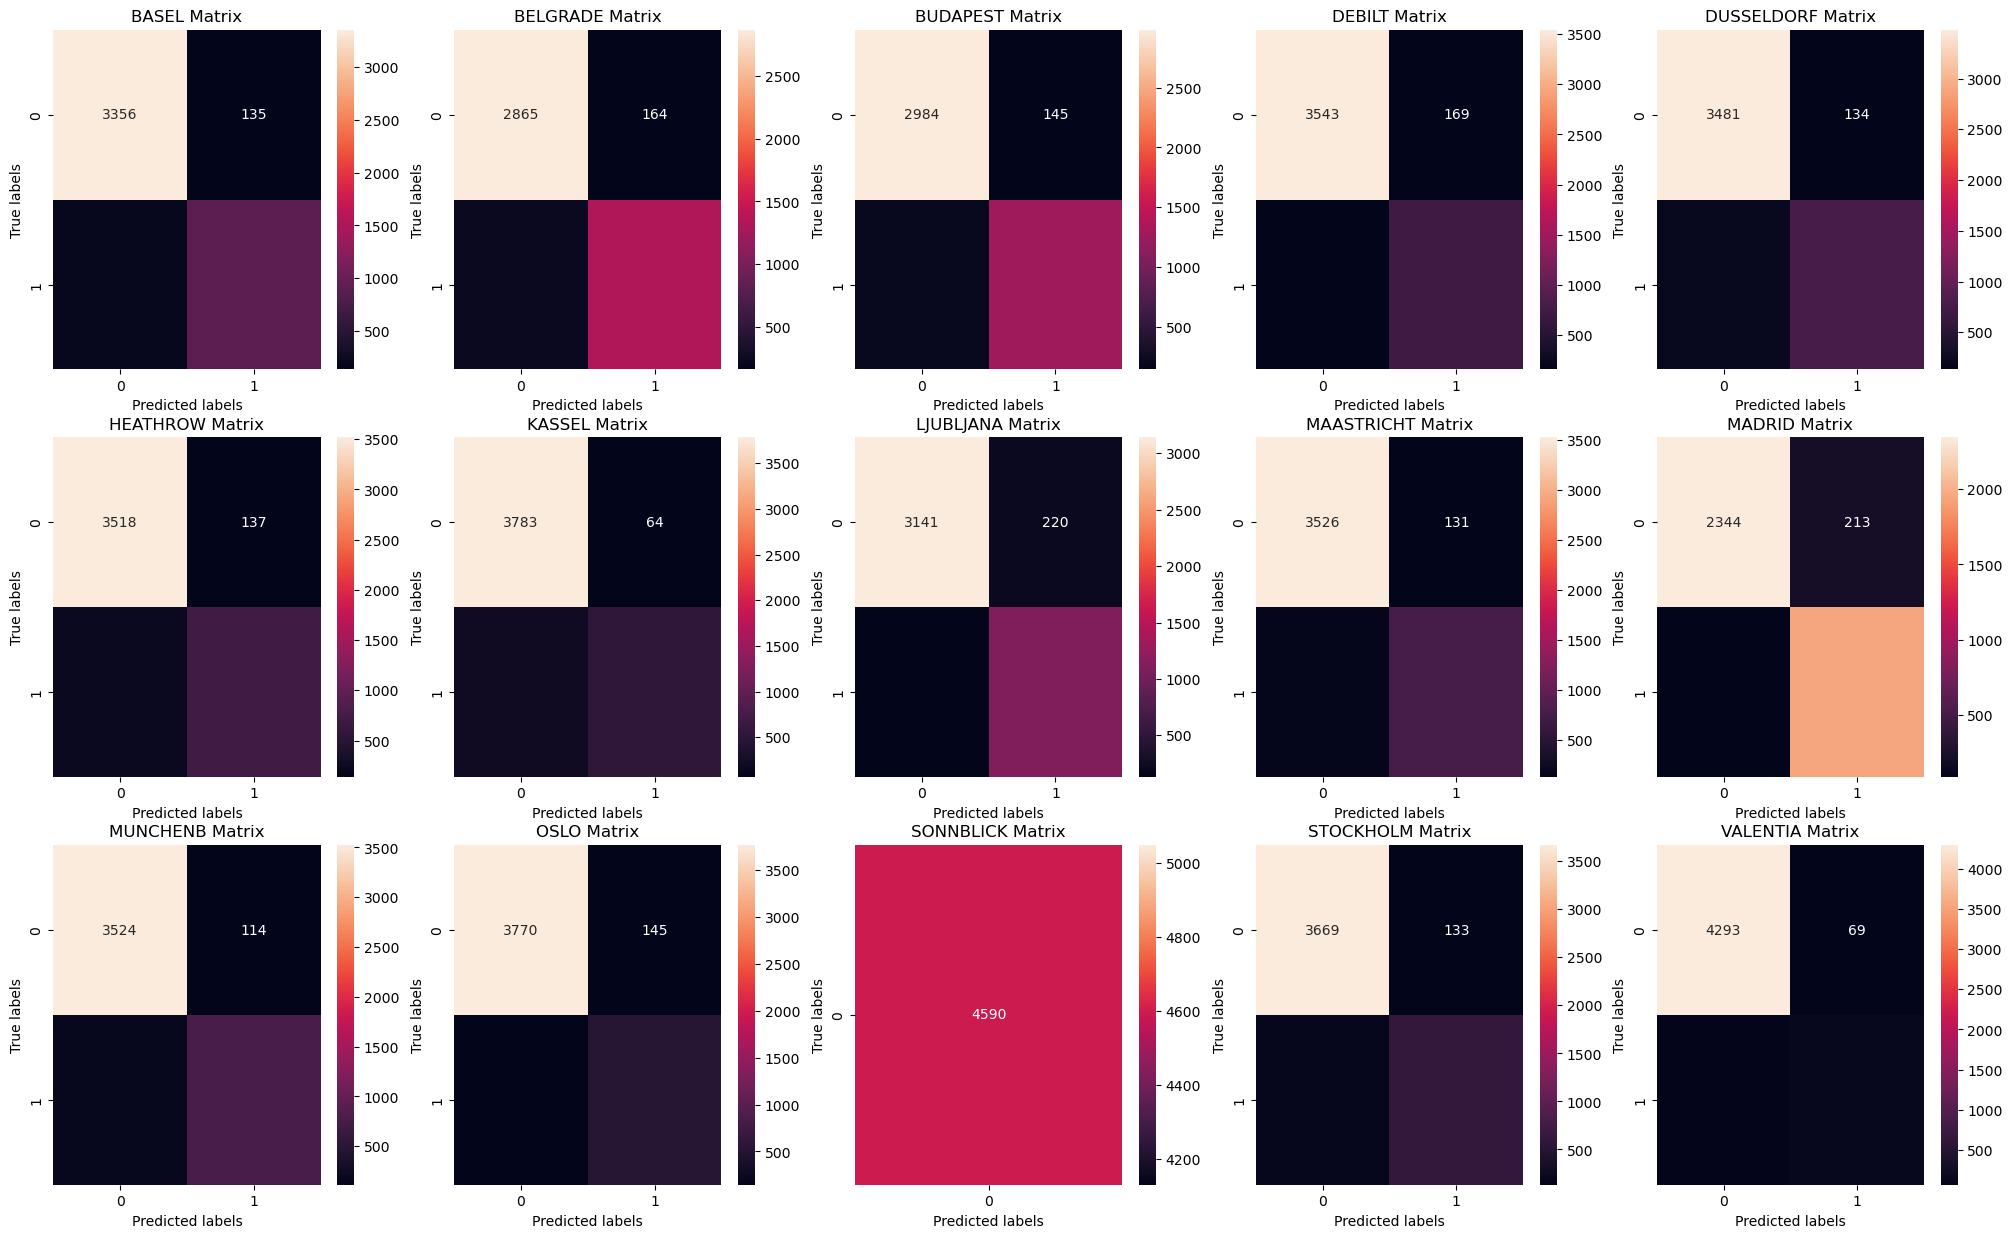

In [48]:
locations = list({x.split('_')[0] for x in df_merged2.columns if x not in ['MONTH', 'DATE']})
locations.sort()
locations
key = '_pleasant_weather'
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred_test4[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

### Classification Report #4

In [49]:
# Generate the classification report
report4 = classification_report(y_test, y_pred_test4)

# Print the classification report
print(report4)

              precision    recall  f1-score   support

           0       0.87      0.82      0.85      1099
           1       0.89      0.85      0.87      1561
           2       0.90      0.86      0.88      1461
           3       0.81      0.82      0.81       878
           4       0.85      0.78      0.82       975
           5       0.84      0.76      0.80       935
           6       0.89      0.71      0.79       743
           7       0.83      0.89      0.86      1229
           8       0.85      0.82      0.84       933
           9       0.90      0.96      0.93      2033
          10       0.87      0.82      0.84       952
          11       0.78      0.78      0.78       675
          12       0.00      0.00      0.00         0
          13       0.82      0.77      0.79       788
          14       0.67      0.61      0.64       228

   micro avg       0.86      0.83      0.85     14490
   macro avg       0.79      0.75      0.77     14490
weighted avg       0.86   

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` p